In [23]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
from keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from keras import backend, models, layers, optimizers
from keras.layers import Dense, Flatten

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import scipy

In [2]:
# Construct the path to each desired file
base_path = "input/"

train_dir = base_path + "train/"
valid_dir = base_path + "valid/"
test_dir = base_path + "test/"

In [3]:
# Data will flow through this generator and will normalize
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Moves data from their respective directories to the model
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

valid_gen = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### Building Model

Now that the data generators have been built, it is time to test a few different architectures in order to determine the most promising. Due to time constraints and my success with transfer learning, I will explore a few of these methods. Transfer Learning is a series of pre-built models using various architectures, pre-trained for excellent performance on the ImageNet dataset.

I will be testing 3 different architectures: VGG16, ResNet50v2, and InceptionV3.

VGG16 is commonly used in image recognition applications because of its design that is lighter-weight and faster than other architectures while maintaining respectable accuracy. ResNet50v2 proved to be a rather robust design in my previous tests, while also being faster and more accurate than VGG16 on the ImageNet data. InceptionV3 was negligibly faster and more accurate than ResNet50v2 on the ImageNet data.

There are more accurate/faster architectures, but in an effort to balance these two factors (which appear to be inversely proportional) I have settled on these three architectures for testing. Once I compare the models on this data, I will then decide on which model to use for further tuning.

While I do plan on use data augmentation, this is something I will introduce to the chosen model later.

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import InceptionV3

In [6]:
# setting up base model
backend.clear_session()

vgg_base = VGG16(weights = 'imagenet',
                include_top = False,
                input_shape = (224,224,3))

resnet_base = ResNet50V2(weights = 'imagenet',
                        include_top = False,
                        input_shape = (224, 224, 3))

inception_base = InceptionV3(weights = 'imagenet',
                            include_top = False,
                            input_shape = (224, 224, 3))

In [7]:
# Ensuring weights do not change
vgg_base.trainable = False
resnet_base.trainable = False
inception_base.trainable = False

In [8]:
# model creation
# VGG16
model_vgg = models.Sequential()
model_vgg.add(vgg_base)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(1028, activation='relu'))
model_vgg.add(layers.Dense(315, activation='softmax'))

# ResNet50V2
model_resnet = models.Sequential()
model_resnet.add(resnet_base)
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dense(1028, activation='relu'))
model_resnet.add(layers.Dense(315, activation='softmax'))

# InceptionV3
model_inception = models.Sequential()
model_inception.add(inception_base)
model_inception.add(layers.Flatten())
model_inception.add(layers.Dense(1028, activation='relu'))
model_inception.add(layers.Dense(315, activation='softmax'))

In [13]:
# Compiling models
# VGG16
model_vgg.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

# ResNet50V2
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

# InceptionV3
model_inception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                       loss = 'categorical_crossentropy',
                       metrics = ['accuracy'])

In [20]:
# Fit VGG16 model and store information
history_vgg = model_vgg.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 50,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_vgg = history_vgg.history
loss_values_vgg = history_dict_vgg['loss']
val_loss_values_vgg = history_dict_vgg['val_loss']
acc_values_vgg = history_dict_vgg['accuracy']
val_acc_values_vgg = history_dict_vgg['val_accuracy']
epochs_vgg = range(1, len(history_dict_vgg['accuracy']) +1)

Epoch 1/50
100/100 [==============================] - 365s 3s/step - loss: 5.5086 - accuracy: 0.0375 - val_loss: 5.3846 - val_accuracy: 0.0530
Epoch 2/50
100/100 [==============================] - 221s 2s/step - loss: 5.2174 - accuracy: 0.0805 - val_loss: 5.1122 - val_accuracy: 0.0830
Epoch 3/50
100/100 [==============================] - 220s 2s/step - loss: 4.9085 - accuracy: 0.1165 - val_loss: 4.6540 - val_accuracy: 0.1460
Epoch 4/50
100/100 [==============================] - 141s 1s/step - loss: 4.5224 - accuracy: 0.1710 - val_loss: 4.3834 - val_accuracy: 0.1800
Epoch 5/50
100/100 [==============================] - 158s 2s/step - loss: 4.1910 - accuracy: 0.2155 - val_loss: 4.1016 - val_accuracy: 0.2140
Epoch 6/50
100/100 [==============================] - 150s 2s/step - loss: 3.9204 - accuracy: 0.2430 - val_loss: 3.7830 - val_accuracy: 0.2650
Epoch 7/50
100/100 [==============================] - 140s 1s/step - loss: 3.6569 - accuracy: 0.2850 - val_loss: 3.6262 - val_accuracy: 0.2880

In [21]:
# Fit ResNet50V2 model and store information
history_resnet = model_resnet.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 50,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_resnet = history_resnet.history
loss_values_resnet = history_dict_resnet['loss']
val_loss_values_resnet = history_dict_resnet['val_loss']
acc_values_resnet = history_dict_resnet['accuracy']
val_acc_values_resnet = history_dict_resnet['val_accuracy']
epochs_resnet = range(1, len(history_dict_resnet['accuracy']) +1)

Epoch 1/50
100/100 [==============================] - 82s 803ms/step - loss: 5.2766 - accuracy: 0.1820 - val_loss: 3.7284 - val_accuracy: 0.3020
Epoch 2/50
100/100 [==============================] - 78s 783ms/step - loss: 3.2643 - accuracy: 0.3885 - val_loss: 2.5780 - val_accuracy: 0.4600
Epoch 3/50
100/100 [==============================] - 78s 784ms/step - loss: 2.4400 - accuracy: 0.4905 - val_loss: 1.9175 - val_accuracy: 0.5770
Epoch 4/50
100/100 [==============================] - 78s 781ms/step - loss: 1.9865 - accuracy: 0.5690 - val_loss: 1.6286 - val_accuracy: 0.6210
Epoch 5/50
100/100 [==============================] - 78s 783ms/step - loss: 1.6832 - accuracy: 0.6255 - val_loss: 1.4663 - val_accuracy: 0.6550
Epoch 6/50
100/100 [==============================] - 79s 793ms/step - loss: 1.4615 - accuracy: 0.6865 - val_loss: 1.2056 - val_accuracy: 0.7090
Epoch 7/50
100/100 [==============================] - 85s 853ms/step - loss: 1.4263 - accuracy: 0.6895 - val_loss: 1.2333 - val_ac

In [22]:
# Fit InceptionV3 model and store information
history_inception = model_inception.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 50,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_inception = history_inception.history
loss_values_inception = history_dict_inception['loss']
val_loss_values_inception = history_dict_inception['val_loss']
acc_values_inception = history_dict_inception['accuracy']
val_acc_values_inception = history_dict_inception['val_accuracy']
epochs_inception = range(1, len(history_dict_inception['accuracy']) +1)

Epoch 1/50
100/100 [==============================] - 49s 467ms/step - loss: 5.2711 - accuracy: 0.1270 - val_loss: 4.1709 - val_accuracy: 0.2170
Epoch 2/50
100/100 [==============================] - 51s 513ms/step - loss: 3.6962 - accuracy: 0.2815 - val_loss: 3.1409 - val_accuracy: 0.3290
Epoch 3/50
100/100 [==============================] - 50s 503ms/step - loss: 2.8694 - accuracy: 0.3725 - val_loss: 2.3118 - val_accuracy: 0.4530
Epoch 4/50
100/100 [==============================] - 52s 524ms/step - loss: 2.3045 - accuracy: 0.4605 - val_loss: 1.8543 - val_accuracy: 0.5270
Epoch 5/50
100/100 [==============================] - 48s 486ms/step - loss: 1.8536 - accuracy: 0.5605 - val_loss: 1.7359 - val_accuracy: 0.5610
Epoch 6/50
100/100 [==============================] - 50s 500ms/step - loss: 1.6689 - accuracy: 0.6120 - val_loss: 1.6702 - val_accuracy: 0.5920
Epoch 7/50
100/100 [==============================] - 52s 521ms/step - loss: 1.6102 - accuracy: 0.6045 - val_loss: 1.3214 - val_ac

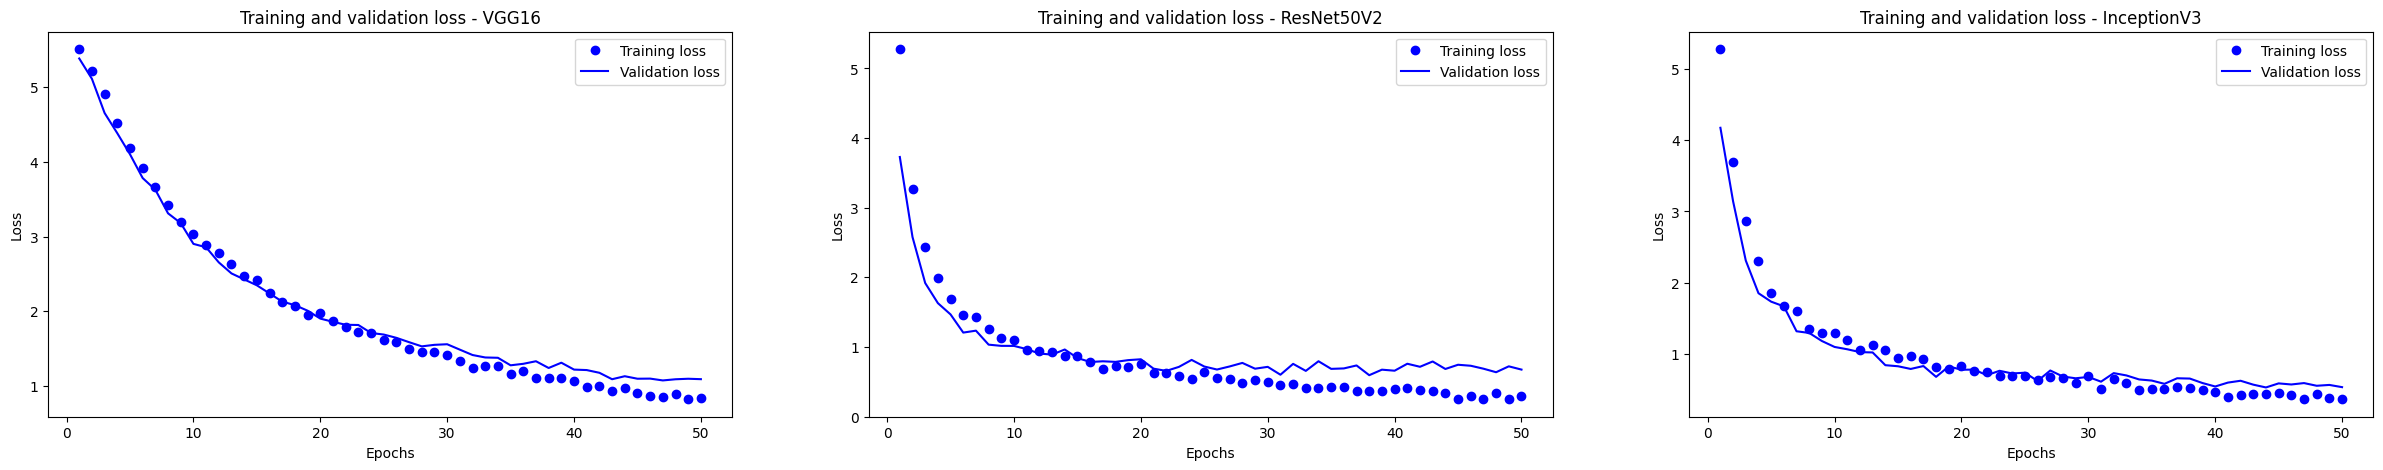

In [51]:
# Plotting Training loss vs Validation loss for comparison
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.plot(epochs_vgg, loss_values_vgg, 'bo', label = 'Training loss')
plt.plot(epochs_vgg, val_loss_values_vgg, 'b', label = 'Validation loss')
plt.title('Training and validation loss - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(132)
plt.plot(epochs_resnet, loss_values_resnet, 'bo', label = 'Training loss')
plt.plot(epochs_resnet, val_loss_values_resnet, 'b', label = 'Validation loss')
plt.title('Training and validation loss - ResNet50V2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(133)
plt.plot(epochs_inception, loss_values_inception, 'bo', label = 'Training loss')
plt.plot(epochs_inception, val_loss_values_inception, 'b', label = 'Validation loss')
plt.title('Training and validation loss - InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

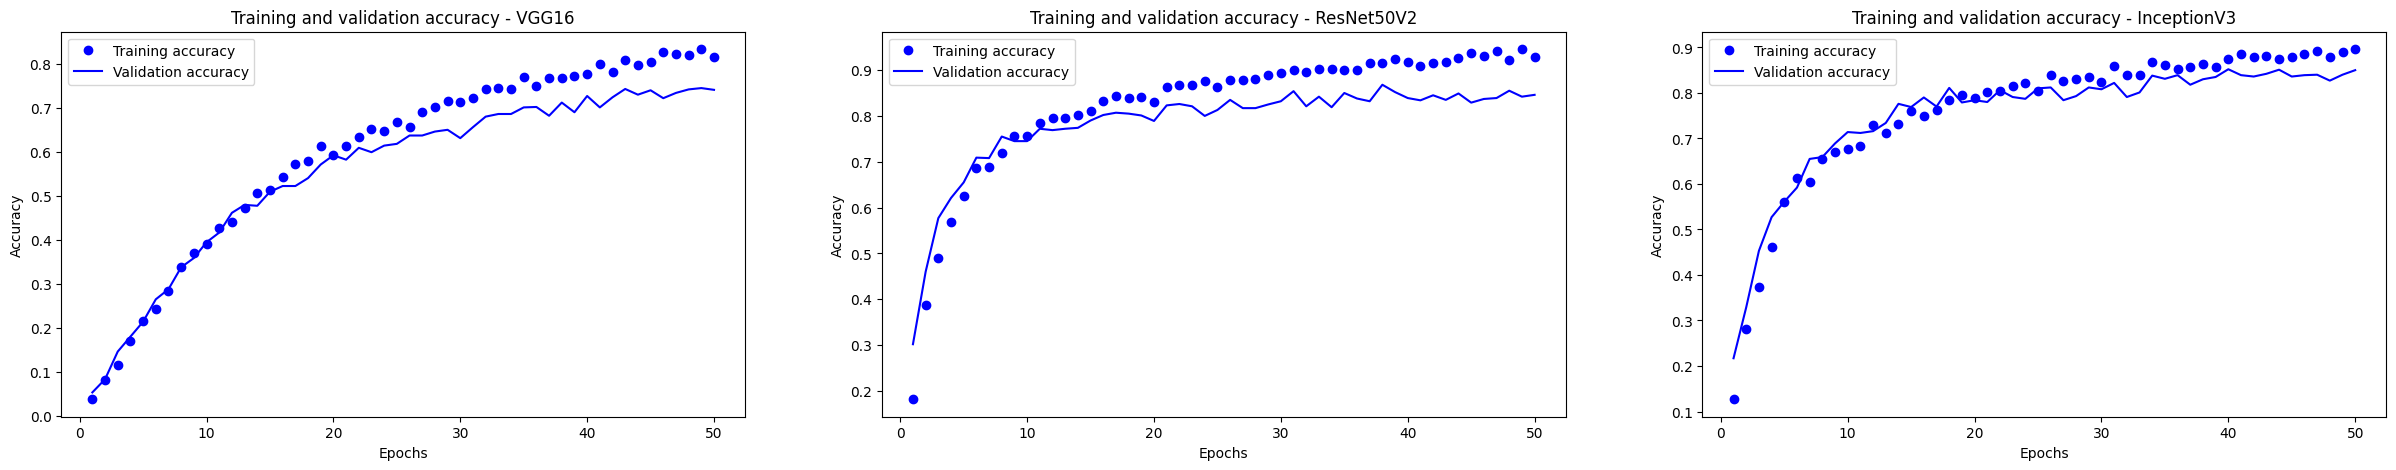

In [52]:
# Plotting Training accuracy vs Validation accuracy for comparison
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.plot(epochs_vgg, acc_values_vgg, 'bo', label = 'Training accuracy')
plt.plot(epochs_vgg, val_acc_values_vgg, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(132)
plt.plot(epochs_resnet, acc_values_resnet, 'bo', label = 'Training accuracy')
plt.plot(epochs_resnet, val_acc_values_resnet, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - ResNet50V2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(133)
plt.plot(epochs_inception, acc_values_inception, 'bo', label = 'Training accuracy')
plt.plot(epochs_inception, val_acc_values_inception, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model Discussion

It can be difficult to tell apart each model in this case. Each appears to be still training with a chance of having better results. This is largely due to the small learning rate attached to each model.